# Overview 

**As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.**

# QUESTION:

1. A study on factors that affect housing prices using the given information on real estate.

2. Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variable

# METRIC OF SUCCESS

> Being able to accuratly predict prices of houses with given variables


#  TOOLBOX :-)

In [1]:
# check percentage of null values on each column
def perc_missing(data):
  # tot sum of missing values
  sum_missing = data.isnull().sum().sort_values(ascending=False)

  #percentage of the total
  perc_total = (data.isnull().sum() / len(data)).sort_values(ascending=False)

  missing_values = pd.DataFrame(
      {
          "TOTAL MISSING": sum_missing,
          "PERCANTAGE":perc_total
      }
  )

  return missing_values

In [2]:
# Removes outliers in particular columns
def remove_Outlier(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  lower_bound  = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  
  df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
 
  return df_out

# Exploratory Data Analysis :

## **Data Loading And Understanding:**

In [3]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

from pandas import Series, DataFrame

# Regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
# load data
url = "http://bit.ly/IndependentProjectWeek7Dataset"

data = pd.read_csv(url)

In [5]:
df_real_estate = data.copy()

In [6]:
df_real_estate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Data Undertanding.
print("\n Data Shape: \t", df_real_estate.shape)


 Data Shape: 	 (21613, 20)


In [8]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [9]:
print("_____________Data types:\n\n ", df_real_estate.dtypes)

_____________Data types:

  id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [10]:
# data description on mean mode std div and quantiles
df_real_estate.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
print(df_real_estate['price'].min())
print(df_real_estate['price'].max())


75000.0
7700000.0


In [12]:
# columns
[i for i in df_real_estate.columns.tolist()]

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [13]:
# check duplicates
df_real_estate.duplicated().unique()

array([False,  True])

In [14]:
df_real_estate.duplicated().sum()

3

In [15]:
# check missing values:
perc_missing(df_real_estate)

,TOTAL MISSING,PERCANTAGE
sqft_lot15,0,0.0
sqft_living15,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


In [16]:
# drop the duplicates
df_real_estate = df_real_estate.drop_duplicates(keep='first')

## ---OBSERVATION----

## **Since we have no missing values and have dropped the duplicated values, we are good to go for analysis** 

## **Univariate Analysis**

In [17]:
# check list
[i for i in df_real_estate.columns.tolist()]

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### Distribution Plots

In [18]:
df_real_estate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


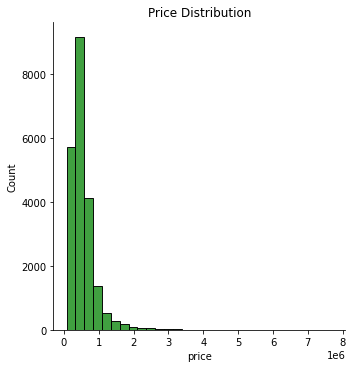

In [19]:
sns.displot(df_real_estate['price'],bins=30,color='green')
plt.title("Price Distribution")
plt.show()

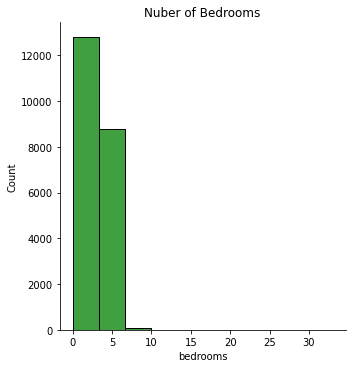

In [20]:
sns.displot(df_real_estate['bedrooms'],bins=10,color='green')
plt.title("Nuber of Bedrooms")
plt.show()

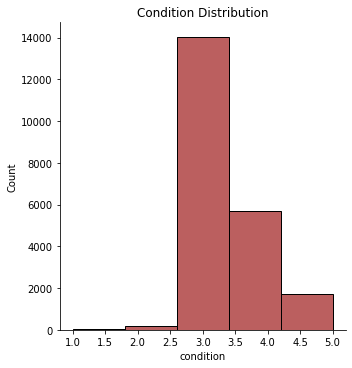

In [21]:
sns.displot(df_real_estate['condition'],bins=5,color='brown')
plt.title("Condition Distribution")
plt.show()

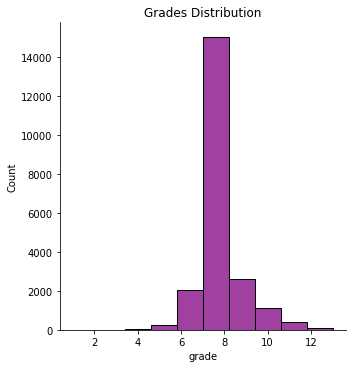

In [22]:
sns.displot(df_real_estate['grade'],bins=10,color='purple')
plt.title("Grades Distribution")
plt.show()

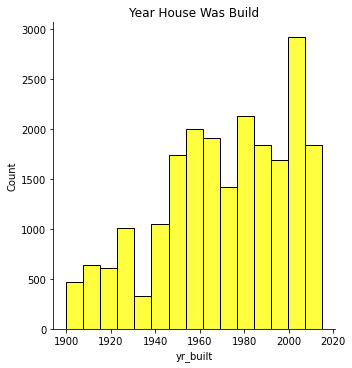

In [23]:
sns.displot(df_real_estate['yr_built'],bins=15,color='yellow')
plt.title("Year House Was Build")
plt.show()

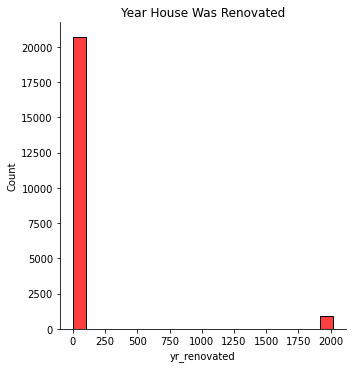

In [24]:
sns.displot(df_real_estate['yr_renovated'],bins=20,color='red')
plt.title("Year House Was Renovated")
plt.show()

### Boxplots

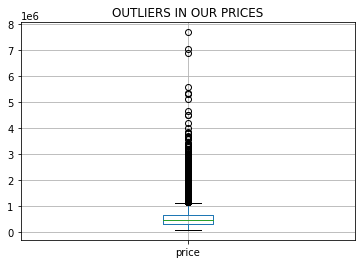

In [25]:
df_real_estate.boxplot(column=['price'])
plt.title("OUTLIERS IN OUR PRICES")
plt.show()

In [26]:
# removing outliers
df_real_estate = remove_Outlier(df_real_estate,'price')

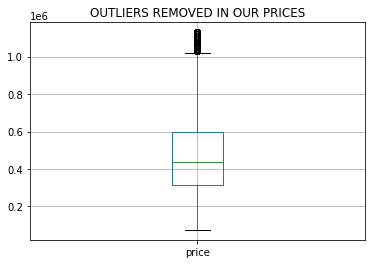

In [27]:
df_real_estate.boxplot(column=['price'])
plt.title("OUTLIERS REMOVED IN OUR PRICES")
plt.show()

### ---OBSERVATION----

1. **Most houses have not been renovated**

2. **Houses were build mostly from the 1940's to 2020**

3. **Most houses have a grading of six and are 1 to 3 bedrooms.**

## **Multivariate Analysis**

In [28]:
# correlation matrix
df_corr_ra = df_real_estate.corr()

In [29]:
df_corr_ra


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.010544,0.009737,0.023012,0.007369,-0.132875,0.028827,-0.000077,0.018141,-0.025437,0.031319,0.009637,-0.003177,0.024429,-0.018597,-0.005908,0.002811,0.021286,0.011429,-0.142425
price,0.010544,1.000000,0.297193,0.455979,0.622745,0.093752,0.273622,0.051309,0.238716,0.038266,0.631631,0.530757,0.236083,0.061348,0.083204,-0.018548,0.430314,0.070608,0.562542,0.082306
bedrooms,0.009737,0.297193,1.000000,0.493150,0.584671,0.023987,0.153622,-0.030560,0.038171,0.026778,0.322870,0.463596,0.283385,0.159457,0.003828,-0.147391,-0.027687,0.137276,0.371275,0.020640
bathrooms,0.023012,0.455979,0.493150,1.000000,0.716762,0.064861,0.500870,-0.003664,0.097178,-0.135531,0.614837,0.638214,0.223121,0.543194,0.025764,-0.206057,-0.007836,0.246421,0.529032,0.064560
sqft_living,0.007369,0.622745,0.584671,0.716762,1.000000,0.158732,0.340662,0.001812,0.169015,-0.072269,0.705990,0.853651,0.376674,0.353777,0.020622,-0.204278,0.012076,0.284899,0.738351,0.172218
sqft_lot,-0.132875,0.093752,0.023987,0.064861,0.158732,1.000000,-0.017428,0.024764,0.078491,-0.003380,0.093129,0.162418,0.011918,0.043098,0.010739,-0.129976,-0.095169,0.221912,0.142754,0.710760
floors,0.028827,0.273622,0.153622,0.500870,0.340662,-0.017428,1.000000,-0.001728,-0.012930,-0.277742,0.456918,0.528651,-0.294697,0.511305,-0.002880,-0.064216,0.036892,0.134808,0.268515,-0.021844
waterfront,-0.000077,0.051309,-0.030560,-0.003664,0.001812,0.024764,-0.001728,1.000000,0.294294,0.014138,-0.013271,-0.005509,0.013232,-0.038959,0.059786,0.044157,-0.045922,-0.059059,0.004454,0.031092
view,0.018141,0.238716,0.038171,0.097178,0.169015,0.078491,-0.012930,0.294294,1.000000,0.034506,0.132906,0.067640,0.199972,-0.065299,0.061719,0.100279,-0.027383,-0.077049,0.187655,0.075642
condition,-0.025437,0.038266,0.026778,-0.135531,-0.072269,-0.003380,-0.277742,0.014138,0.034506,1.000000,-0.167470,-0.178047,0.179719,-0.353529,-0.060481,-0.005811,-0.017915,-0.100560,-0.117832,0.001038


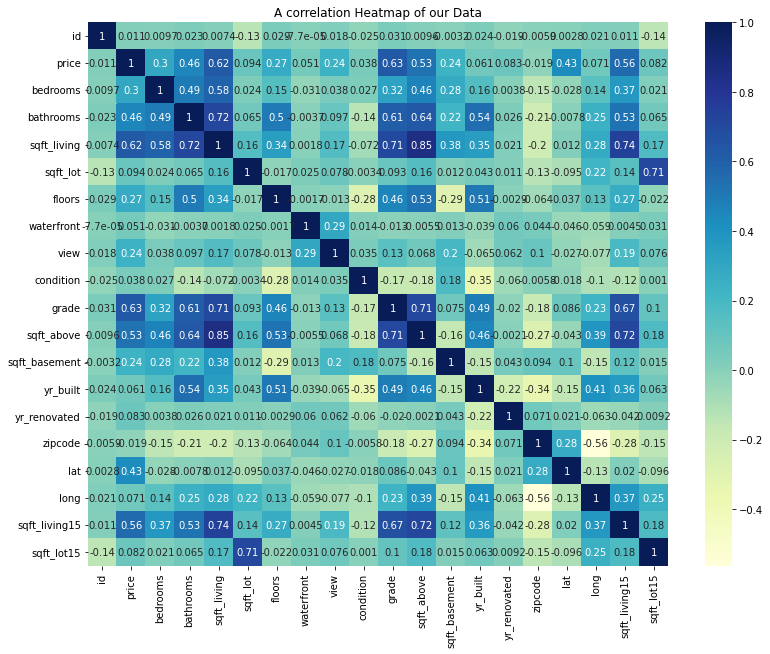

In [30]:
plt.figure(figsize=(13,10))
sns.heatmap(df_corr_ra,cmap='YlGnBu',annot=True)
plt.title("A correlation Heatmap of our Data")
plt.show()

# REGRESSION ANALYSIS:

In [31]:
df_real_estate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
# check columns
[i for i in df_real_estate.columns.tolist()]

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

### FEATURES TO TRAIN ON

'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated'

### TARGET VARIABLE(price)


In [33]:
# Splitting our Data into Train and Test sets
X = df_real_estate.iloc[:,2:12].values

y = df_real_estate.iloc[:, 1].values

In [34]:
np.mean(y) # price mean

477216.89209125104

# **MODEL 1: LINEAR REGRESSION**

In [35]:
# from our x and y lets split into train and test 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
# train the algo

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting on test

pred = regressor.predict(X_test)

# mean squared error
mse = np.mean((pred - y_test)**2)

# r-square
r_sq = regressor.score(X_test,y_test)

print(mse)
print(r_sq)

20906247444.481586
0.5091728997566922


In [37]:
# intercept

print(regressor.intercept_)

# slope

print(regressor.coef_)

-460734.9031315381
[-8.49078833e+03 -2.03046553e+04  1.32711567e+02 -2.61742529e-02
  2.59515105e+04  8.40095962e+04  3.50897788e+04  4.06735732e+04
  8.40181863e+04 -4.08277292e+01]


In [44]:
X_test.tolist()[:5]

[[2.0, 1.75, 1740.0, 7290.0, 1.0, 0.0, 0.0, 3.0, 8.0, 1280.0],
 [4.0, 1.75, 2190.0, 9752.0, 1.0, 0.0, 0.0, 3.0, 8.0, 2190.0],
 [3.0, 1.75, 2140.0, 3584.0, 1.0, 0.0, 0.0, 3.0, 7.0, 1070.0],
 [2.0, 2.5, 1430.0, 1201.0, 3.0, 0.0, 0.0, 3.0, 8.0, 1430.0],
 [3.0, 3.5, 2480.0, 3200.0, 2.0, 0.0, 0.0, 3.0, 10.0, 2480.0]]

In [38]:
# make predictions from our regression
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
check = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

check

,Actual,Predicted
0,550000.0,485335.915938
1,450000.0,490856.869650
2,680000.0,454582.392876
3,505000.0,474905.075377
4,910000.0,684620.200726
...,...,...
4090,467000.0,596944.946418
4091,475000.0,404528.167397
4092,554729.0,663306.403750
4093,295000.0,475363.685300


In [60]:
# check score
regressor.score(X_test,y_test)

0.5091728997566922

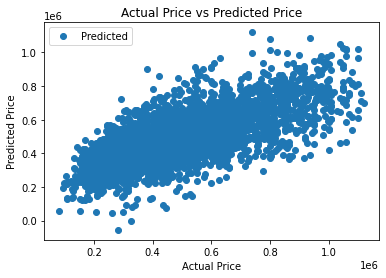

In [39]:
# Plotting to find any relationship between the variables
# 
check.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Text(0.5, 1.0, 'Residual plot')

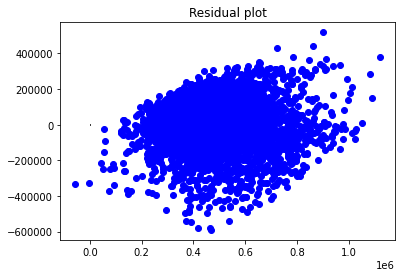

In [40]:
# Residual Plot
x_plot = plt.scatter(pred, (pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [41]:
print("Mean of Prices: ", np.mean(y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


mean_1 = np.mean(y)
mean_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

see_perc_change = ((mean_1 - mean_2) / (mean_1 + mean_2)/2) * 100

print("\nPercentage difference between\nPrice Mean and Root Mean Squared Error is: {:.3f}".format(see_perc_change),"%")


Mean of Prices:  477216.89209125104
Mean Absolute Error: 114092.2405944219
Mean Squared Error: 20906247444.481586
Root Mean Squared Error: 144589.92857208828

Percentage difference between
Price Mean and Root Mean Squared Error is: 26.747 %


### ------ OBSERVATIONS -------
# From the output, we see that the value of root mean squared error  
# which is 26% less of the mean value of the  prices
# This means that our algorithm did a decent job.

# **MODEL 2: RIDGE REGRESSION**

In [46]:
# Training the model
ridge_reg = Ridge(alpha=0.05,normalize=True)

# fit models
ridge_reg.fit(X_train,y_train)

# predictor
r_pred = ridge_reg.predict(X_test)

In [48]:
# 
# make predictions from our regression

# To compare the actual output values for X_test with the predicted values, execute the following 
ridge_check = pd.DataFrame({'Actual':y_test, 'Predicted': r_pred})

ridge_check# 
# make predictions from our regression

# To compare the actual output values for X_test with the predicted values, execute the following 
ridge_check = pd.DataFrame({'Actual':y_test, 'Predicted': r_pred})

ridge_check

,Actual,Predicted
0,550000.0,474480.352917
1,450000.0,498700.102905
2,680000.0,434607.854397
3,505000.0,466537.828585
4,910000.0,688311.363416
...,...,...
4090,467000.0,562380.458089
4091,475000.0,411282.411766
4092,554729.0,653821.343049
4093,295000.0,480547.794018


In [59]:
# check score
ridge_reg.score(X_test,y_test)

0.5065686042079988

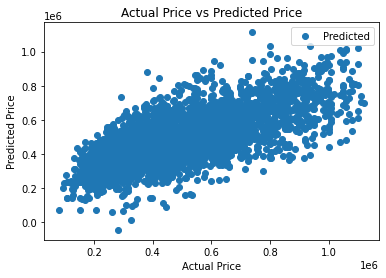

In [49]:
# Plotting to find any relationship between the variables
ridge_check.plot(x='Actual', y='Predicted', style='o')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [50]:
print("Mean of Prices: ", np.mean(y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, r_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, r_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, r_pred)))


mean_1_r = np.mean(y)
mean_2_r = np.sqrt(metrics.mean_squared_error(y_test, r_pred))

see_perc_change_r = ((mean_1_r - mean_2_r) / (mean_1_r + mean_2_r)/2) * 100

print("\nPercentage difference between\nPrice Mean and Root Mean Squared Error is: {:.3f}".format(see_perc_change_r),"%")


Mean of Prices:  477216.89209125104
Mean Absolute Error: 114849.14560252785
Mean Squared Error: 21017174585.897694
Root Mean Squared Error: 144973.01330212355

Percentage difference between
Price Mean and Root Mean Squared Error is: 26.700 %


### ------ OBSERVATIONS -------
## From the output, we see that the value of root mean squared error  
## which is 26.700% less of the mean value of the  prices not a bigger difference from our linear regression but we take what we get
## This means that our algorithm did a decent job.

# **MODEL 3: LASSO REGRESSION**

> (Least Absolute Shrinkage Selector Operator)

In [51]:
lass_reg = Lasso(alpha=0.3, normalize=True)

In [52]:
lass_reg.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [53]:
# lasso predictor
l_pred  = lass_reg.predict(X_test)

In [54]:
y_test

array([550000., 450000., 680000., ..., 554729., 295000., 350000.])

In [56]:
# 
# make predictions from our regression

# To compare the actual output values for X_test with the predicted values, execute the following 
lasso_check = pd.DataFrame({'Actual':y_test, 'Predicted': l_pred})

lasso_check

,Actual,Predicted
0,550000.0,485188.179323
1,450000.0,491127.029678
2,680000.0,454205.546608
3,505000.0,474550.923246
4,910000.0,684809.125210
...,...,...
4090,467000.0,596329.155420
4091,475000.0,404684.321380
4092,554729.0,663100.903706
4093,295000.0,475565.038253


In [58]:
# check score
lass_reg.score(X_test,y_test)

0.5091781496972763

In [57]:
print("Mean of Prices: ", np.mean(y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, l_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, l_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, l_pred)))


mean_1_l = np.mean(y)
mean_2_l = np.sqrt(metrics.mean_squared_error(y_test, l_pred))

see_perc_change_l = ((mean_1_l - mean_2_l) / (mean_1_l + mean_2_l)/2) * 100

print("\nPercentage difference between\nPrice Mean and Root Mean Squared Error is: {:.3f}".format(see_perc_change_l),"%")


Mean of Prices:  477216.89209125104
Mean Absolute Error: 114097.45989837867
Mean Squared Error: 20906023828.962265
Root Mean Squared Error: 144589.15529514052

Percentage difference between
Price Mean and Root Mean Squared Error is: 26.747 %


# Final Observation 

## From our Analysis we can see that Ridge Regression is our best option to make predictions with compared to Linear or Lasso



# Putting things into actions

In [73]:
df_real_estate.columns[2:12]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above'],
      dtype='object')

In [65]:
X_test.tolist()[:1]

[[2.0, 1.75, 1740.0, 7290.0, 1.0, 0.0, 0.0, 3.0, 8.0, 1280.0]]

In [69]:
X_test.shape

(4095, 10)

In [76]:
# a function that we can play around to make predictions
# give it values it gives you a price

def house_price(bedrooms=2.0,bathrooms=1.75,sqft_living=1740.0,sqft_lot= 7290.0,floors=1.0,waterfront=0.0,view= 0.0,condition=3.0,grade=8.0,sqft_above=1280.0):
  model = Ridge(alpha=1.0)
  # fit models

  mylist = []
  
  mylist.append(bedrooms)
  mylist.append(bathrooms)
  mylist.append(sqft_living)
  mylist.append(sqft_lot)
  mylist.append(floors)
  mylist.append(waterfront)
  mylist.append(view)
  mylist.append(condition)
  mylist.append(grade)
  mylist.append(sqft_above)


  mat = np.array(mylist)

  model.fit(X_train[:],y_train)
  # predictor
  r_pred = ridge_reg.predict(mat)

  return r_pred


In [78]:
house_price(2.0, 1.75, 1740.0, 7290.0, 1.0, 0.0, 0.0, 3.0, 8.0, 1280.0)

ValueError: ignored